In [47]:
#Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')

In [48]:
df=pd.read_excel("Cafe_Data_MRA.xlsx")

In [49]:
df.head()

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
0,2010-04-01,G0470115,QUA MINERAL WATER(1000ML),13:15:11,1,50.0,11.88,0.0,61.88,BEVERAGE
1,2010-04-01,G0470115,MONSOON MALABAR (AULAIT),13:15:11,1,100.0,23.75,0.0,123.75,BEVERAGE
2,2010-04-01,G0470116,MASALA CHAI CUTTING,13:17:35,1,40.0,9.50,0.0,49.50,BEVERAGE
3,2010-04-01,G0470117,QUA MINERAL WATER(1000ML),13:19:55,1,50.0,11.88,0.0,61.88,BEVERAGE
4,2010-04-01,G0470283,MOROCCAN MINT TEA,01:20:18,1,45.0,10.69,0.0,55.69,BEVERAGE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145830 entries, 0 to 145829
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          145830 non-null  datetime64[ns]
 1   Bill Number   145830 non-null  object        
 2   Item Desc     145830 non-null  object        
 3   Time          145830 non-null  object        
 4   Quantity      145830 non-null  int64         
 5   Rate          145830 non-null  float64       
 6   Tax           145830 non-null  float64       
 7   Discount      145830 non-null  float64       
 8   Total         145830 non-null  float64       
 9   Category      145830 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 11.1+ MB


In [5]:
df.shape

(145830, 10)

In [6]:
df.describe()

,Quantity,Rate,Tax,Discount,Total
count,145830.000000,145830.000000,145830.000000,145830.000000,145830.000000
mean,1.121299,161.782259,48.929061,0.095079,224.959852
std,0.477237,102.244631,40.272851,3.720735,164.960776
min,1.000000,0.010000,0.000000,0.000000,0.010000
25%,1.000000,95.000000,22.560000,0.000000,117.560000
50%,1.000000,125.000000,32.060000,0.000000,167.060000
75%,1.000000,225.000000,72.000000,0.000000,315.000000
max,30.000000,2100.000000,2731.250000,825.000000,14231.250000


In [7]:
df.isnull().sum()

Date            0
Bill Number     0
Item Desc       0
Time            0
Quantity        0
Rate            0
Tax             0
Discount        0
Total           0
Category        0
dtype: int64

In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 680


,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
198,2010-04-01,G0470211,B.M.T. PANINI,19:42:27,1,105.0,24.94,0.0,129.94,FOOD
199,2010-04-01,G0470211,B.M.T. PANINI,19:42:27,1,105.0,24.94,0.0,129.94,FOOD
244,2010-04-01,G0470270,B.M.T. PANINI,00:08:20,1,105.0,24.94,0.0,129.94,FOOD
551,2010-05-01,G0474965,PHILLYCREAM CHEESE &CHILLY PAN,13:33:51,1,105.0,24.94,0.0,129.94,FOOD
588,2010-05-01,G0475009,B.M.T. PANINI,17:12:21,1,105.0,24.94,0.0,129.94,FOOD
...,...,...,...,...,...,...,...,...,...,...
144615,2010-10-31,G0506562,DOPPIO,19:08:48,1,60.0,14.25,0.0,74.25,BEVERAGE
144727,2010-10-31,G0506566,CHEESE CAKE OF THE WEEK,19:20:52,1,105.0,24.94,0.0,129.94,FOOD
145129,2010-12-31,G0517963,CAPPUCCINO,20:50:13,1,60.0,14.25,0.0,74.25,BEVERAGE
145255,2010-12-31,G0517869,PHILLYCREAM CHEESE &CHILLY PAN,15:12:41,1,105.0,24.94,0.0,129.94,FOOD


In [10]:
df['Item Desc'].value_counts()

NIRVANA HOOKAH SINGLE                   8553
MINT FLAVOUR SINGLE                     5817
CAPPUCCINO                              5495
GREAT LAKES SHAKE                       4895
SAMBUCA                                 4425
                                        ... 
UDAIPUR LILY                               1
ADD BUTTERED TOAST                         1
DECAFFINATE COFFEE FRAPPE                  1
INDIA KINGS OCEAN BLUE                     1
ZINZI WHITE (BTL)                          1
Name: Item Desc, Length: 580, dtype: int64

In [11]:
df['Category'].value_counts()

FOOD                57023
BEVERAGE            43573
TOBACCO             36496
LIQUOR               6200
MISC                 1187
WINES                 809
MERCHANDISE           487
LIQUOR & TOBACCO       54
LIQUOR                  1
Name: Category, dtype: int64

In [12]:
# Category Liquor shows up twice due to the presence of a space.
df[['Category']] = df[['Category']].replace('LIQUOR ','LIQUOR')

In [13]:
df_1 = df.groupby(['Category','Item Desc']).agg({'Total':['sum']})

In [14]:
df_1.sort_values(('Total', 'sum'), ascending=False)

Total
                                                   sum
Category    Item Desc                                 
TOBACCO     NIRVANA HOOKAH SINGLE           2953134.60
            SAMBUCA                         2291058.00
            MINT FLAVOUR SINGLE             1840501.00
            CALCUTTA MINT                   1640860.40
            N R G  HOOKAH                   1193015.40
...                                                ...
MERCHANDISE MUGS - PLAIN COLOUR                  75.38
            DIP BOWL                             67.50
            CUTTING GLASS                        27.00
FOOD        ADD BUTTERED TOAST                   18.56
            MOTHERS DAY SPL                       0.05

[602 rows x 1 columns]

In [15]:
df_1.head()

Total
                                               sum
Category Item Desc                                
BEVERAGE 2 AXE TWIST                        173.25
         2 RED BULL                        4083.85
         3 RED BULL                      100187.63
         5 RED BULL                       18933.90
         ADD CARAMEL FLAVOUR               2444.26

In [16]:
df_1.loc[('BEVERAGE'),:].sort_values(('Total', 'sum'), ascending=False)

,Total
,sum
Item Desc,
CAPPUCCINO,550251.99
RED BULL 2+1,378632.29
RED BULL ENERGY DRINK,373016.12
LEMON ICED TEA,282713.79
BERRY BLAST,258198.16
...,...
MIXED FLAVOUR SINGLE,297.00
PEACH BULL,185.63


In [17]:
df_1.loc[('FOOD'),:].sort_values(('Total', 'sum'), ascending=False)

,Total
,sum
Item Desc,
GREAT LAKES SHAKE,843122.11
JR.CHL AVALANCHE,713565.60
POUTINE WITH FRIES,580284.11
OREO COOKIE SHAKE,405644.95
B.M.T. PANINI,391066.69
...,...
MUSHROOM & CORN,216.58
CHICKEN HAM,216.55


In [18]:
df_1.loc[('TOBACCO'),:].size

52

In [19]:
df_1.loc[('LIQUOR'),:].sort_values(('Total', 'sum'), ascending=False)

,Total
,sum
Item Desc,
CARLSBERG,538802.08
TUBORG,381051.73
KF DRAUGHT PITCHER (2LTR),330617.67
KF DRAUGHT (1LTR),330073.59
KF DRAUGHT (1/2LTR),251396.88
HOEGAARDEN MUG (1 LITRE),43378.30
BUDWEISER,28298.46
1+1 KF 1/2 LITER,22312.36


In [20]:
df_1.loc[('MERCHANDISE'),:].sort_values(('Total', 'sum'), ascending=False)

,Total
,sum
Item Desc,
GREAT LAKES T-SHIRTS,13351.80
SANDASS,9844.88
FLAVOUR 500 GMS,6378.75
CH COFFEE MUGS,6050.00
CH TINS,5842.20
...,...
GREAT LAKES MUG SINGLE,159.75
CH WRAPPING PAPER,90.00


In [21]:
df_1.loc[('MISC'),:].sort_values(('Total', 'sum'), ascending=False)

,Total
,sum
Item Desc,
RED BULL SHEESHA,61182.00
PLAIN JANE (CHOCOLATE),22520.37
PARTY CHARGES @ 500/-,14231.25
ROSE FLAVORS SINGLE,13068.00
PLAIN JANE (STRAWBERRY),12386.51
KF DRAFT MUG,11254.74
GUAVA,10164.00
ADD ON S,8469.93


In [22]:
df_1.loc[('WINES'),:].size

50

In [23]:
df_1.loc[('LIQUOR & TOBACCO'),:].sort_values(('Total', 'sum'), ascending=False)

,Total
,sum
Item Desc,
BEER HOOKAH,32324.00
2 DOM BEER + 1SPL SHEESHA,6562.50
4 DOM BEER + 1SPL SHEESHA,1968.76
2 DOM BEER + 1PREM SHEESHA,1706.26


Text(0.5, 1.0, 'Total')

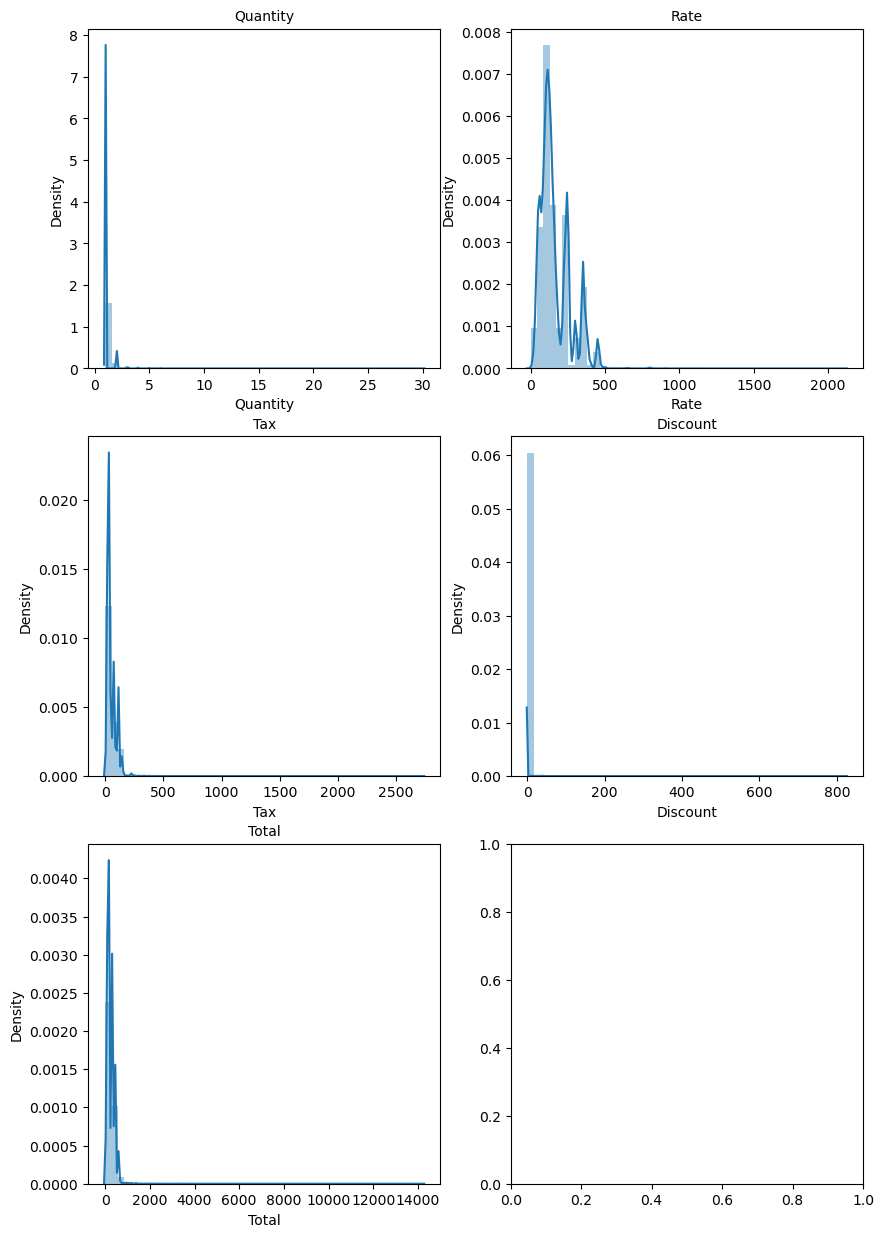

In [24]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10, 15)
a = sns.distplot(df['Quantity'] , ax=axes[0][0])
a.set_title("Quantity",fontsize=10)
a = sns.distplot(df['Rate'] , ax=axes[0][1])
a.set_title("Rate",fontsize=10)
a = sns.distplot(df['Tax'] , ax=axes[1][0])
a.set_title("Tax",fontsize=10)
a = sns.distplot(df['Discount'] , ax=axes[1][1])
a.set_title("Discount",fontsize=10)
a = sns.distplot(df['Total'] , ax=axes[2][0])
a.set_title("Total",fontsize=10)

<AxesSubplot:>

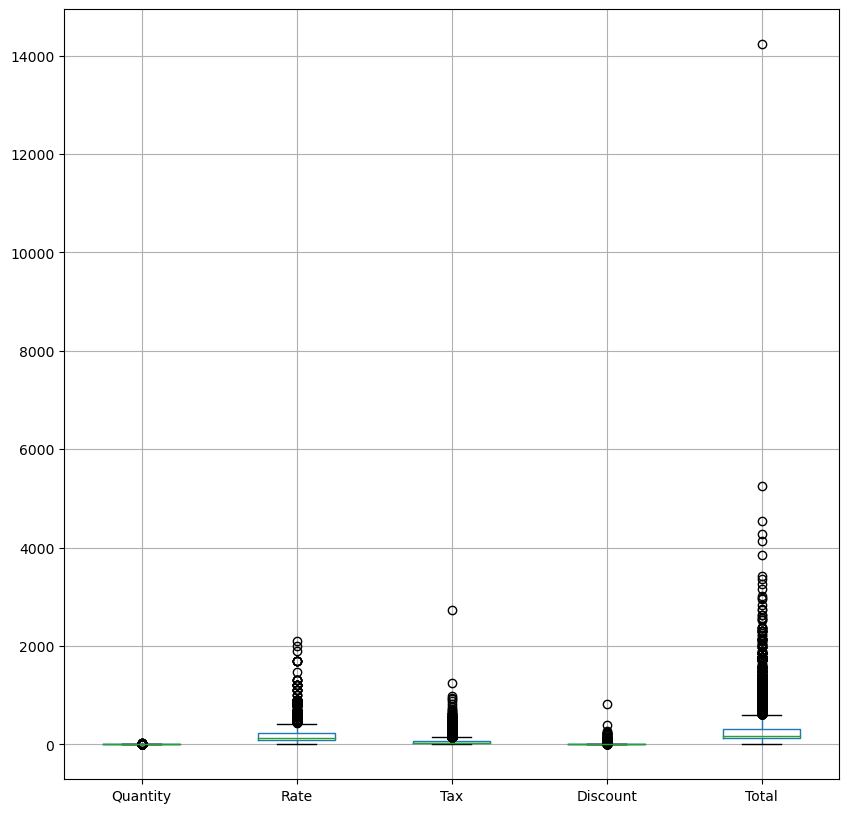

In [25]:
# Check for outliers
plt.figure(figsize=(10,10))
df.boxplot()

In [26]:
corr=df.corr()

(5.5, -0.5)

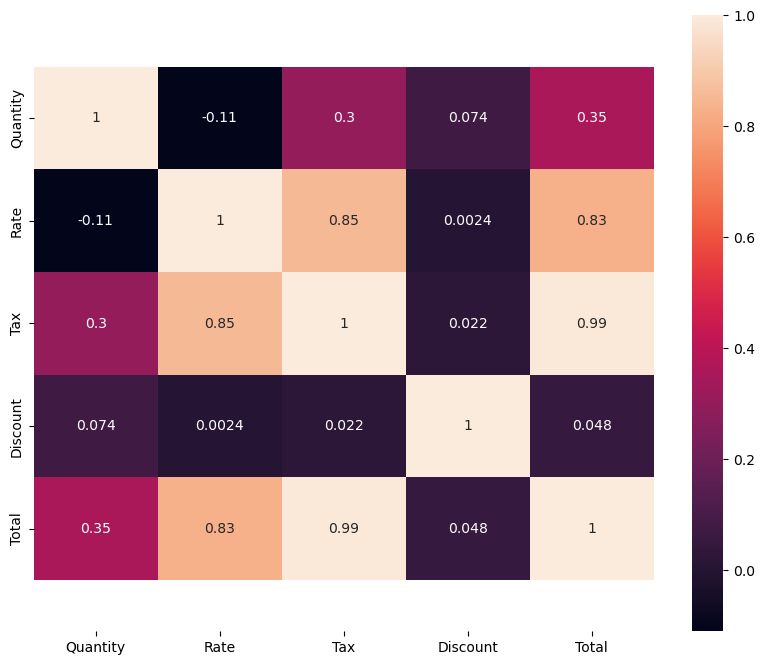

In [27]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(corr, annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [28]:
kmdf=pd.read_excel("Cafe_Data_MRA.xlsx")

In [29]:
kmdf.drop_duplicates(inplace=True) 

In [30]:
dups=kmdf.duplicated().sum()
dups

0

In [31]:
kmdf.head()

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
0,2010-04-01,G0470115,QUA MINERAL WATER(1000ML),13:15:11,1,50.0,11.88,0.0,61.88,BEVERAGE
1,2010-04-01,G0470115,MONSOON MALABAR (AULAIT),13:15:11,1,100.0,23.75,0.0,123.75,BEVERAGE
2,2010-04-01,G0470116,MASALA CHAI CUTTING,13:17:35,1,40.0,9.50,0.0,49.50,BEVERAGE
3,2010-04-01,G0470117,QUA MINERAL WATER(1000ML),13:19:55,1,50.0,11.88,0.0,61.88,BEVERAGE
4,2010-04-01,G0470283,MOROCCAN MINT TEA,01:20:18,1,45.0,10.69,0.0,55.69,BEVERAGE


In [32]:
# Outlier Treatment
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [33]:
lrRate,urRate=remove_outlier(kmdf['Rate'])
kmdf['Rate']=np.where(kmdf['Rate']>urRate,urRate,kmdf['Rate'])
kmdf['Rate']=np.where(kmdf['Rate']<lrRate,lrRate,kmdf['Rate'])
lrTax,urTax=remove_outlier(kmdf['Tax'])
kmdf['Tax']=np.where(kmdf['Tax']>urTax,urTax,kmdf['Tax'])
kmdf['Tax']=np.where(kmdf['Tax']<lrTax,lrTax,kmdf['Tax'])
lrDiscount,urDiscount=remove_outlier(kmdf['Discount'])
kmdf['Discount']=np.where(kmdf['Discount']>urDiscount,urDiscount,kmdf['Discount'])
kmdf['Discount']=np.where(kmdf['Discount']<lrDiscount,lrDiscount,kmdf['Discount'])
lrTotal,urTotal=remove_outlier(kmdf['Total'])
kmdf['Total']=np.where(kmdf['Total']>urTotal,urTotal,kmdf['Total'])
kmdf['Total']=np.where(kmdf['Total']<lrTotal,lrTotal,kmdf['Total'])
lrQuantity,urQuantity=remove_outlier(kmdf['Quantity'])
kmdf['Quantity']=np.where(kmdf['Quantity']>urQuantity,urQuantity,kmdf['Quantity'])
kmdf['Quantity']=np.where(kmdf['Quantity']<lrQuantity,lrQuantity,kmdf['Quantity'])

<AxesSubplot:>

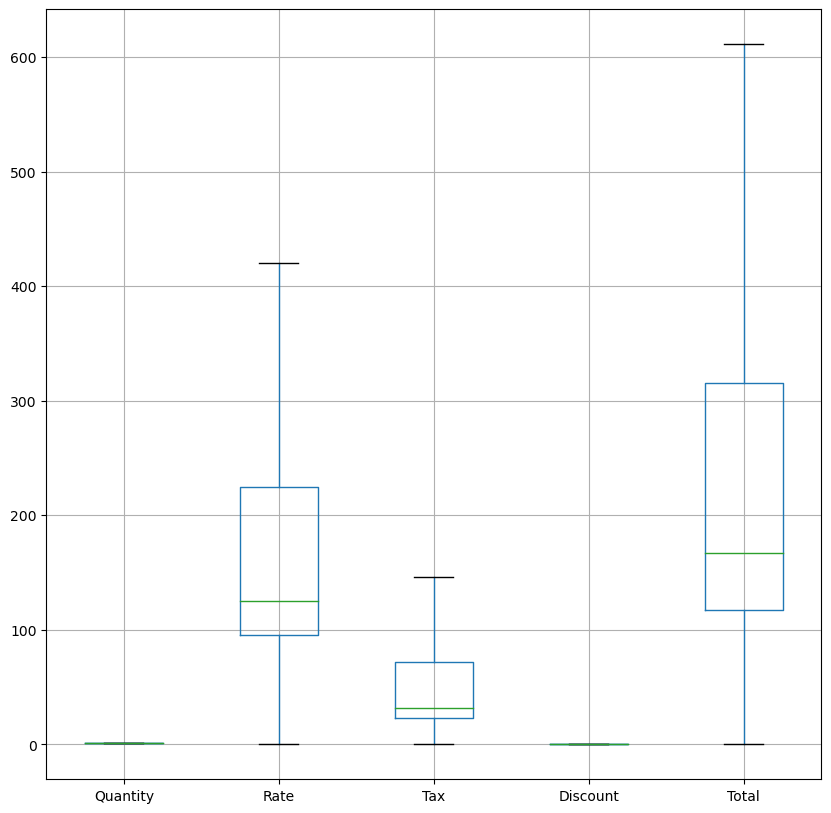

In [34]:
# Check for outliers
plt.figure(figsize=(10,10))
kmdf.boxplot()

In [35]:
df.head()

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
0,2010-04-01,G0470115,QUA MINERAL WATER(1000ML),13:15:11,1,50.0,11.88,0.0,61.88,BEVERAGE
1,2010-04-01,G0470115,MONSOON MALABAR (AULAIT),13:15:11,1,100.0,23.75,0.0,123.75,BEVERAGE
2,2010-04-01,G0470116,MASALA CHAI CUTTING,13:17:35,1,40.0,9.50,0.0,49.50,BEVERAGE
3,2010-04-01,G0470117,QUA MINERAL WATER(1000ML),13:19:55,1,50.0,11.88,0.0,61.88,BEVERAGE
4,2010-04-01,G0470283,MOROCCAN MINT TEA,01:20:18,1,45.0,10.69,0.0,55.69,BEVERAGE


In [36]:
from sklearn import set_config
set_config(print_changed_only=False)

In [39]:
df.columns

Index(['Date', 'Bill Number ', 'Item Desc', 'Time', 'Quantity', 'Rate', 'Tax',
       'Discount', 'Total', 'Category'],
      dtype='object')

In [50]:
df.head()

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
0,2010-04-01,G0470115,QUA MINERAL WATER(1000ML),13:15:11,1,50.0,11.88,0.0,61.88,BEVERAGE
1,2010-04-01,G0470115,MONSOON MALABAR (AULAIT),13:15:11,1,100.0,23.75,0.0,123.75,BEVERAGE
2,2010-04-01,G0470116,MASALA CHAI CUTTING,13:17:35,1,40.0,9.50,0.0,49.50,BEVERAGE
3,2010-04-01,G0470117,QUA MINERAL WATER(1000ML),13:19:55,1,50.0,11.88,0.0,61.88,BEVERAGE
4,2010-04-01,G0470283,MOROCCAN MINT TEA,01:20:18,1,45.0,10.69,0.0,55.69,BEVERAGE


In [53]:
df.groupby(['Bill Number ','Item Desc'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Bill Number ')

Item Desc,1 AXE TWIST,1+1 BTL4 SEASON WHITE,1+1 GLS 4SEASON RED,1+1 GLS 4SEASONS WHITE,1+1 KF 1 LITER,1+1 KF 1/2 LITER,1+1 KF 2 LITER,1+1 VLN CAB SAUV (BTL),1+1 VLN CAB SAUV (GLS),1+1 VLN CAB SAUV CLASIQ (BTL),...,WHITE WINE SHEESHA,WILD MUSHROOM LINGUINI,YEMENI GREAT LAKES (AULAIT),YEMENI GREAT LAKES (REG),YIN N YANG FONDUE,ZEN ROCK SQUARE VASE,ZERO SIZE SHOT GLS,ZINZI RED (GLS),ZINZI WHITE (GLS),ZINZI WHITE (BTL)
Bill Number,,,,,,,,,,,,,,,,,,,,,
G0470109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G0470110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G0470111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G0470112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G0470113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N0034042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
N0034043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
N0034044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_1=df.groupby(['Bill Number ','Item Desc'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Bill Number ')

In [30]:
df_1.head()

Item Desc,1 AXE TWIST,1+1 BTL4 SEASON WHITE,1+1 GLS 4SEASON RED,1+1 GLS 4SEASONS WHITE,1+1 KF 1 LITER,1+1 KF 1/2 LITER,1+1 KF 2 LITER,1+1 VLN CAB SAUV (BTL),1+1 VLN CAB SAUV (GLS),1+1 VLN CAB SAUV CLASIQ (BTL),...,WHITE WINE SHEESHA,WILD MUSHROOM LINGUINI,YEMENI GREAT LAKES (AULAIT),YEMENI GREAT LAKES (REG),YIN N YANG FONDUE,ZEN ROCK SQUARE VASE,ZERO SIZE SHOT GLS,ZINZI RED (GLS),ZINZI WHITE (GLS),ZINZI WHITE (BTL)
Bill Number,,,,,,,,,,,,,,,,,,,,,
G0470109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G0470110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G0470111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G0470112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G0470113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df_1.shape

(69982, 580)

In [54]:
# Encoding the data to make it binary. For Market Basket analysis, the presence of an item is given more importance
#than the total quantities present. We equate anything less than 0 to 0 and make values greater than 1 as 1

def encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

In [55]:
dt=df_1.applymap(encode) #mapping the above user defined function

In [56]:
dt.head()

Item Desc,1 AXE TWIST,1+1 BTL4 SEASON WHITE,1+1 GLS 4SEASON RED,1+1 GLS 4SEASONS WHITE,1+1 KF 1 LITER,1+1 KF 1/2 LITER,1+1 KF 2 LITER,1+1 VLN CAB SAUV (BTL),1+1 VLN CAB SAUV (GLS),1+1 VLN CAB SAUV CLASIQ (BTL),...,WHITE WINE SHEESHA,WILD MUSHROOM LINGUINI,YEMENI GREAT LAKES (AULAIT),YEMENI GREAT LAKES (REG),YIN N YANG FONDUE,ZEN ROCK SQUARE VASE,ZERO SIZE SHOT GLS,ZINZI RED (GLS),ZINZI WHITE (GLS),ZINZI WHITE (BTL)
Bill Number,,,,,,,,,,,,,,,,,,,,,
G0470109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G0470110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G0470111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G0470112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G0470113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
itemsets = apriori(dt, min_support = 0.002, use_colnames = True,low_memory=True)
itemsets.sort_values('support',ascending=False,inplace=True)
itemsets

,support,itemsets
96,0.119874,(NIRVANA HOOKAH SINGLE )
88,0.083050,(MINT FLAVOUR SINGLE )
27,0.078134,(CAPPUCCINO )
57,0.069604,(GREAT LAKES SHAKE )
117,0.063202,(SAMBUCA )
...,...,...
226,0.002015,"(RED BULL ENERGY DRINK , N R G HOOKAH..."
90,0.002015,(MIXED FLAVOUR SINGLE )
154,0.002015,"(COTTAGE CHEESE PANINI , B.M.T. PANINI..."
194,0.002015,"(POUTINE WITH FRIES , COUNTRY LEMON..."


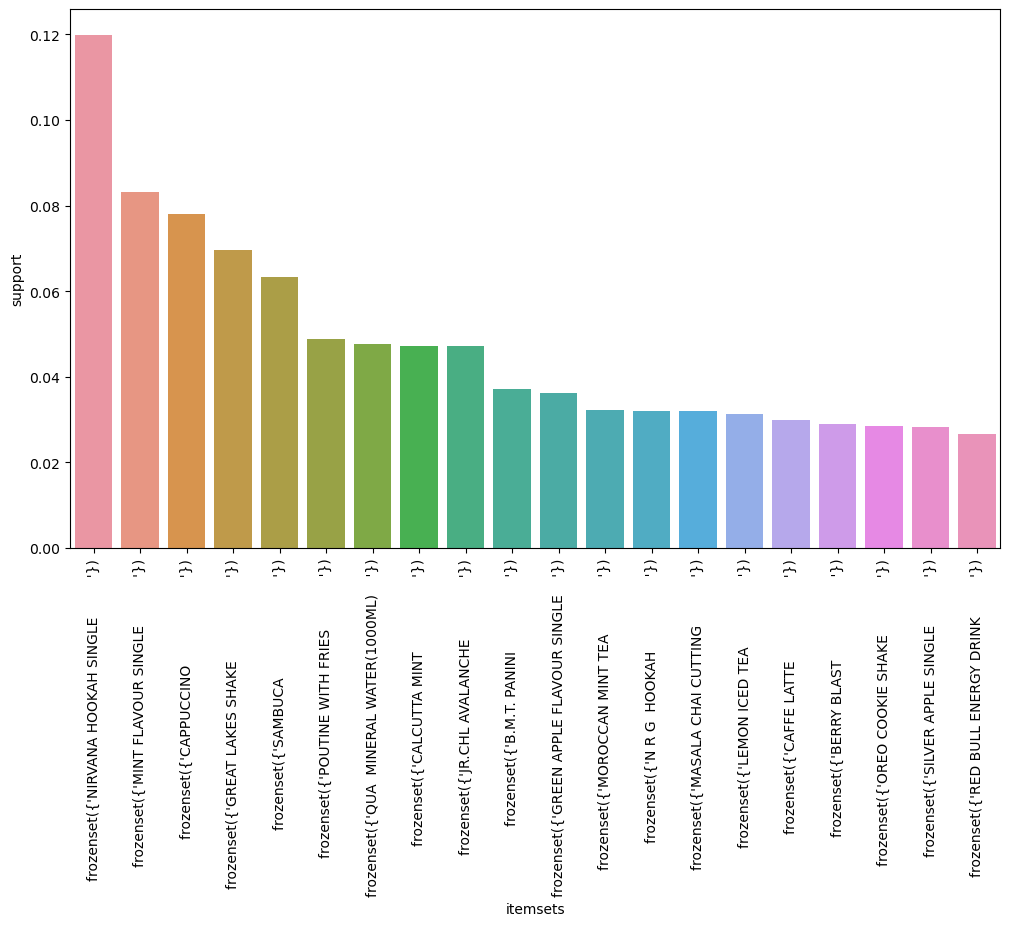

In [54]:
plt.figure(figsize=(12,7))
sns.barplot(itemsets.sort_values('support',ascending=False).iloc[0:20,1],
            itemsets.sort_values('support',ascending=False).iloc[0:20,0])
plt.xticks(rotation=90)
plt.show()

In [55]:
# Association Rules
basket = association_rules(itemsets, metric='lift',min_threshold=0.1) 

In [56]:
basket

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(NIRVANA HOOKAH SINGLE ),(POUTINE WITH FRIES ),0.119874,0.048784,0.006330,0.052807,1.082471,0.000482,1.004248,0.086565
1,(POUTINE WITH FRIES ),(NIRVANA HOOKAH SINGLE ),0.048784,0.119874,0.006330,0.129760,1.082471,0.000482,1.011360,0.080095
2,(CAPPUCCINO ),(MINT FLAVOUR SINGLE ),0.078134,0.083050,0.005987,0.076628,0.922670,-0.000502,0.993045,-0.083338
3,(MINT FLAVOUR SINGLE ),(CAPPUCCINO ),0.083050,0.078134,0.005987,0.072092,0.922670,-0.000502,0.993488,-0.083748
4,(CAPPUCCINO ),(GREAT LAKES SHAKE ),0.078134,0.069604,0.005544,0.070958,1.019463,0.000106,1.001458,0.020709
...,...,...,...,...,...,...,...,...,...,...
179,(COTTAGE CHEESE PANINI ),(B.M.T. PANINI ),0.023034,0.037224,0.002015,0.087469,2.349810,0.001157,1.055061,0.587977
180,(COUNTRY LEMONADE ),(POUTINE WITH FRIES ),0.025850,0.048784,0.002015,0.077944,1.597730,0.000754,1.031625,0.384039
181,(POUTINE WITH FRIES ),(COUNTRY LEMONADE ),0.048784,0.025850,0.002015,0.041301,1.597730,0.000754,1.016117,0.393299
182,(CAPPUCCINO ),(PHILLYCREAM CHEESE &CHILLY PAN),0.078134,0.026578,0.002015,0.025786,0.970206,-0.000062,0.999187,-0.032238


In [57]:
basket = basket.sort_values(['lift'], ascending =[False]) 

In [58]:
basket.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
154,(B.M.T. PANINI ),(ADD FRIES ),0.037224,0.010746,0.002158,0.057965,5.394333,0.001758,1.050125,0.846116
155,(ADD FRIES ),(B.M.T. PANINI ),0.010746,0.037224,0.002158,0.200798,5.394333,0.001758,1.204672,0.823469
26,(SAMBUCA ),(RED BULL 2+1 ),0.063202,0.016676,0.004144,0.065566,3.931846,0.003090,1.052321,0.795974
27,(RED BULL 2+1 ),(SAMBUCA ),0.016676,0.063202,0.004144,0.248500,3.931846,0.003090,1.246572,0.758312
91,(MAGGI NDL ARRABIATA ),(SAMBUCA ),0.012589,0.063202,0.002501,0.198638,3.142907,0.001705,1.169007,0.690516
90,(SAMBUCA ),(MAGGI NDL ARRABIATA ),0.063202,0.012589,0.002501,0.039566,3.142907,0.001705,1.028088,0.727823
112,(CALCUTTA MINT ),(RED BULL 2+1 ),0.047255,0.016676,0.002372,0.050197,3.010159,0.001584,1.035292,0.700913
113,(RED BULL 2+1 ),(CALCUTTA MINT ),0.016676,0.047255,0.002372,0.142245,3.010159,0.001584,1.110743,0.679116
78,(B.M.T. PANINI ),(PHILLYCREAM CHEESE &CHILLY PAN),0.037224,0.026578,0.002615,0.070250,2.643119,0.001626,1.046971,0.645694
79,(PHILLYCREAM CHEESE &CHILLY PAN),(B.M.T. PANINI ),0.026578,0.037224,0.002615,0.098387,2.643119,0.001626,1.067838,0.638633


In [59]:
basket.shape

(184, 10)

In [59]:
results_df = pd.DataFrame(basket)
results_df.to_excel('basket_MRA_4.xlsx',index=False)